### This project is to use supervised learning models to identify customers who are likely to churn in the futre. It includes the following four parts:
- [Part 1. Exploratory Data Analysis](#Part-1.-Exploratory-Data-Analysis-(EDA))    
- [Part 2. Feature Preprocessing](#Part-2.-Feature-Preprocessing)    
- [Part 3. Model Training and Evaluation](#Part-3.-Model-Training-and-Evaluation)   

### Part 1. Exploratory Data Analysis (EDA)

### 1.1 Look at the raw data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/bank_data.csv')
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [3]:
df.info()  # no null values in this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# Check the unique values for each column
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [5]:
# Check the proportion of positive cases (y = 1)
y = df.Exited
print('The proportion of churn customers is: {}%'.format(np.round(y.sum() / y.shape[0] * 100, 2)))

# The data is imbalanced. We may or may not need to deal with it given that 20% is a fair proportion for positive cases.

The proportion of churn customers is: 20.37%


### 1.2 Look at features

In [6]:
# continuous features
df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

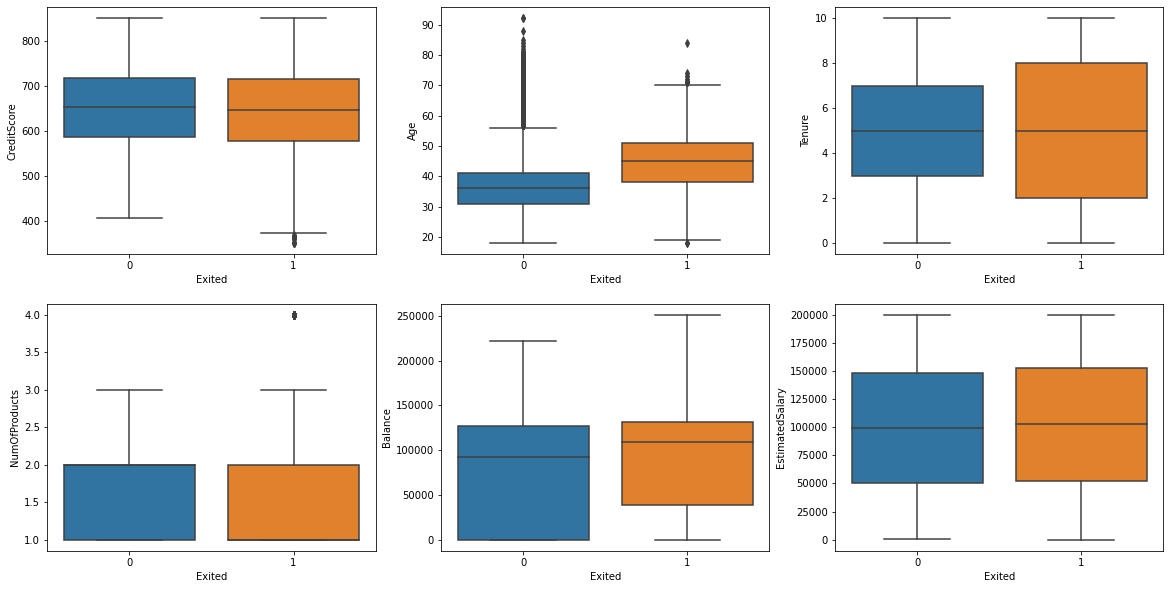

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

_, ax = plt.subplots(2, 3, figsize=[20, 10])
sns.boxplot(x='Exited', y='CreditScore', data=df, ax=ax[0][0])
sns.boxplot(x='Exited', y='Age', data=df, ax=ax[0][1])
sns.boxplot(x='Exited', y='Tenure', data=df, ax=ax[0][2])
sns.boxplot(x='Exited', y='NumOfProducts', data=df, ax=ax[1][0])
sns.boxplot(x='Exited', y='Balance', data=df, ax=ax[1][1])
sns.boxplot(x='Exited', y='EstimatedSalary', data=df, ax=ax[1][2])

#### Insights:
- CreditScore: Distributions in both classes are similar.
- Age: Younger people tend to retent while elders incline to churn.   
- Tenure: Customers having tenure of 3-7 years retent or churn by half. Those having long or short tenures incline to churn. 
- NumOfProducts: No significant difference. 
- Balance: It looks like customers having small balance tend to retent. However, there could be a lot of customers having zero balance and they leave the accounts idle. It is hard to say these customers churned or not. Maybe we need to see whether these customers are active or not, if prediction result is not satisfying.
- EstimatedSalary: No significant difference. 

#### Conclusion:   
Factors that may have influences include **Age**, **Tenure** and **Balance**.




<AxesSubplot:xlabel='Exited', ylabel='count'>

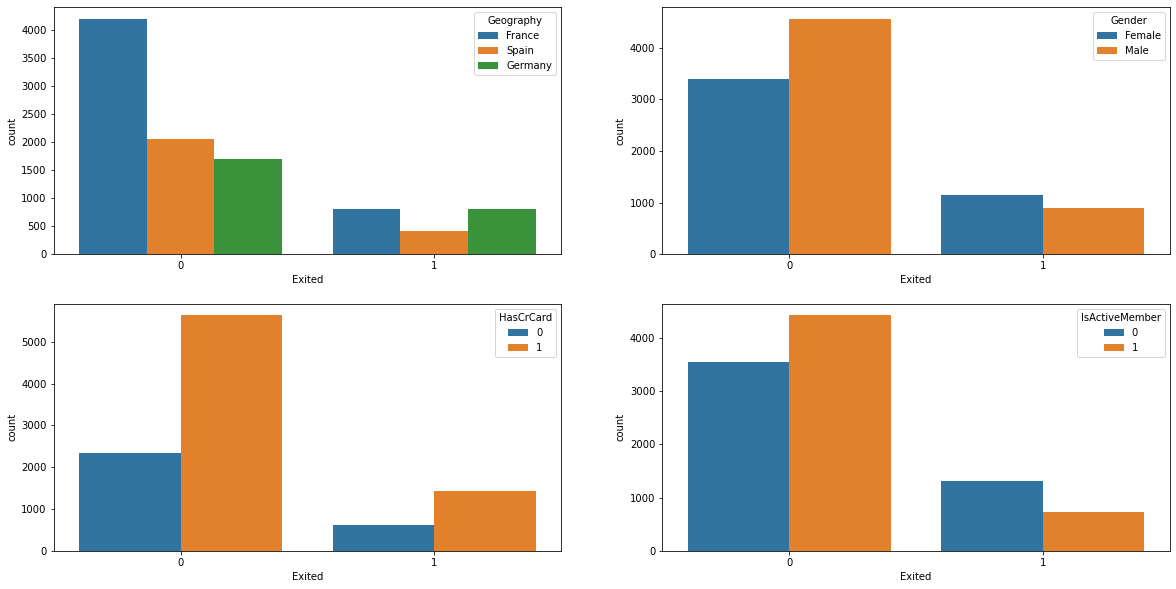

In [8]:
# categorical features
# columns: 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember'

_, ax = plt.subplots(2, 2, figsize=[20, 10])
sns.countplot(x='Exited', hue='Geography', data=df, ax=ax[0][0])
sns.countplot(x='Exited', hue='Gender', data=df, ax=ax[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=df, ax=ax[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=df, ax=ax[1][1])

#### Insights:
- Geography: It looks like French German people tend to retent while Spanish peple incline to churn. 
- Gender: More male customers retent while slightly more female customers churned. 
- HasCrCard: No significant difference.
- IsActiveMember: Active customers tend to retent while inactive customers incline to churn. 

### Part 2. Feature Preprocessing

In [9]:
# binary encoding of gender: 0 - male, 1 - female
df['IsMale'] = df['Gender'] == 'Male'
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,IsMale
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,False
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,False
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,False


In [10]:
# One-hot encoding of Geography
df = pd.get_dummies(df, columns=['Geography'])
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,IsMale,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,False,1,0,0
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,False,0,0,1
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,False,1,0,0


In [11]:
# get features
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Gender', 'Exited'], axis=1)
X.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,IsMale,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,False,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,False,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,False,1,0,0


In [12]:
y.head(3)

0    1
1    0
2    1
Name: Exited, dtype: int64

### Part 3. Model Training and Evaluation

### 3.1 Generate training and testing datasets

In [13]:
from sklearn import model_selection
from random import sample

trainX, testX, trainY, testY = model_selection.train_test_split(X, y, test_size=0.05, stratify=y, random_state=2020)
pos_rate_train = trainY.sum() / trainY.shape[0]
pos_rate_test = testY.sum() / testY.shape[0]

print('-----Before balancing-----')
print('Training data size: {}, containing {:.2f}% positive cases.'.format(trainX.shape[0], pos_rate_train * 100))
print('Testing data size: {}, containing {:.2f}% positive cases.\n'.format(testX.shape[0], pos_rate_test * 100))


# balance data
pos_indices_train = trainY[trainY==1].index.tolist()
neg_indices_train = trainY[trainY==0].index.tolist()

neg_sample_train = sample(neg_indices_train, len(pos_indices_train))
trainX = trainX.loc[pos_indices_train + neg_sample_train]
trainY = trainY.loc[pos_indices_train + neg_sample_train]

pos_rate_train = trainY.sum() / trainY.shape[0]
pos_rate_test = testY.sum() / testY.shape[0]

print('----- After balancing-----')
print('Training data size: {}, containing {:.2f}% positive cases.'.format(trainX.shape[0], pos_rate_train * 100))
print('Testing data size: {}, containing {:.2f}% positive cases.\n'.format(testX.shape[0], pos_rate_test * 100))

-----Before balancing-----
Training data size: 9500, containing 20.37% positive cases.
Testing data size: 500, containing 20.40% positive cases.

----- After balancing-----
Training data size: 3870, containing 50.00% positive cases.
Testing data size: 500, containing 20.40% positive cases.



In [14]:
np.round(trainY.sum() / trainY.shape[0] * 100, 2)

50.0

In [15]:
# standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

### 3.2 Models initial exploration

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

In [17]:
model_names = ['Logistic Regression', 'KNN', 'Random Forest']
models = [lr, knn, rf]

for i in range(len(models)):
    cv_score = model_selection.cross_val_score(models[i], trainX, trainY, cv=5)
    mean_score = cv_score.mean()
    print('Accuracy for {} is: {:.2f}%'.format(model_names[i], mean_score * 100))

Accuracy for Logistic Regression is: 70.59%
Accuracy for KNN is: 71.45%
Accuracy for Random Forest is: 77.05%


### 3.3 Hyperparameters optimization

In [18]:
from sklearn.model_selection import GridSearchCV

def print_results(grid_search):
    print('Best score: {:.2f}'.format(grid_search.best_score_))
    for parameter in sorted(grid_search.best_params_.keys()):
        print('{} : {}'.format(parameter, grid_search.best_params_[parameter]))

In [19]:
# Logistic regression
parameters = {'penalty': ('l1', 'l2'), 'C': (0.001, 0.01, 0.1, 1)}
lr_grid = GridSearchCV(LogisticRegression(solver='liblinear'), parameters, cv=5)
lr_grid.fit(trainX, trainY)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.001, 0.01, 0.1, 1), 'penalty': ('l1', 'l2')})

In [20]:
print_results(lr_grid)

Best score: 0.72
C : 0.01
penalty : l1


In [21]:
best_lr = lr_grid.best_estimator_

In [22]:
# KNN
parameters = {'n_neighbors': [17, 19, 21, 23, 25]}
knn_grid = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
knn_grid.fit(trainX, trainY)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [17, 19, 21, 23, 25]})

In [23]:
print_results(knn_grid)

Best score: 0.72
n_neighbors : 23


In [24]:
best_knn = knn_grid.best_estimator_

In [25]:
# Random Forest
parameters = {'n_estimators': [50, 80, 100, 120, 150]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=2020), parameters, cv=5)
rf_grid.fit(trainX, trainY)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2020),
             param_grid={'n_estimators': [50, 80, 100, 120, 150]})

In [26]:
print_results(rf_grid)

Best score: 0.77
n_estimators : 120


In [27]:
best_rf = rf_grid.best_estimator_

### 3.4 Model Evaluation   
#### Precision and Recall
Precision = tp / (tp + fp), low precision means high false positive rate (customers who do not thurn are predicted as churning). It may lead to high cost (e.g. promotion etc.)   
Recall = tp / (tp + fn), low recall means high false negative rate (churning customers are predicted as not churning). It would lead to loss of customers.   
In our case, we consider recall more than precision since we want to keep our current customers as many as possible.   

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

def print_evaluation(model_name,  cm):
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    print('Evaluation for {}: '.format(model_name))
    print('Accuracy = {:.2f}%'.format(accuracy * 100))
    print('Precision = {:.2f}'.format(precision))
    print('Recall = {:.2f}\n'.format(recall))

In [29]:
confusion_matrices = {'Logistic Regression': confusion_matrix(testY, best_lr.predict(testX)),
                      'K nearest neighbors': confusion_matrix(testY, best_knn.predict(testX)),
                      'Random Forest': confusion_matrix(testY, best_rf.predict(testX))}

for name, cm in confusion_matrices.items():
    print_evaluation(name, cm)

Evaluation for Logistic Regression: 
Accuracy = 73.60%
Precision = 0.41
Recall = 0.71

Evaluation for K nearest neighbors: 
Accuracy = 74.80%
Precision = 0.42
Recall = 0.66

Evaluation for Random Forest: 
Accuracy = 76.80%
Precision = 0.46
Recall = 0.73



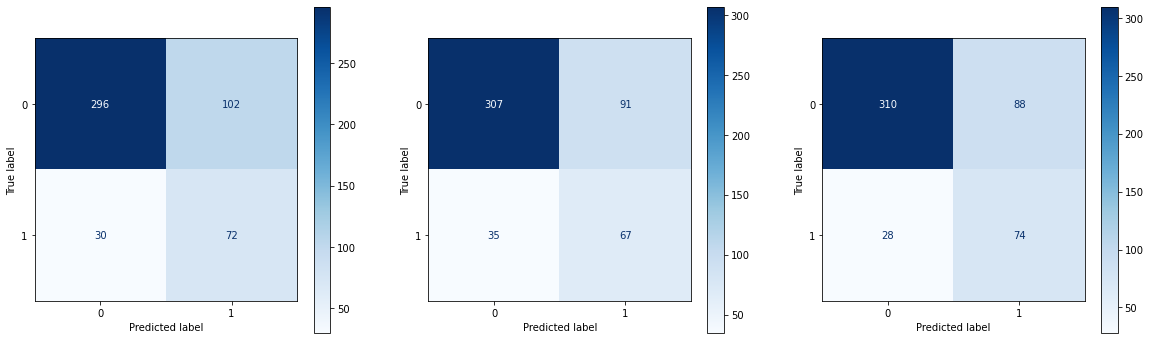

In [30]:
from sklearn.metrics import plot_confusion_matrix
_, ax = plt.subplots(1, 3, figsize=[20, 6])

plot_confusion_matrix(best_lr, testX, testY, ax=ax[0], cmap='Blues')
plot_confusion_matrix(best_knn, testX, testY, ax=ax[1], cmap='Blues')
plot_confusion_matrix(best_rf, testX, testY, ax=ax[2], cmap='Blues')

#### ROC Curves and AUC scores

In [31]:
from sklearn.metrics import roc_curve

predY_lr = best_lr.predict_proba(testX)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(testY, predY_lr)

predY_knn = best_knn.predict_proba(testX)[:, 1]
fpr_knn, tpr_knn, thresh = roc_curve(testY, predY_knn)

predY_rf = best_rf.predict_proba(testX)[:, 1]
fpr_rf, tpr_rf, thresh = roc_curve(testY, predY_rf)

Text(0.5, 1.0, 'ROC curve - RF')

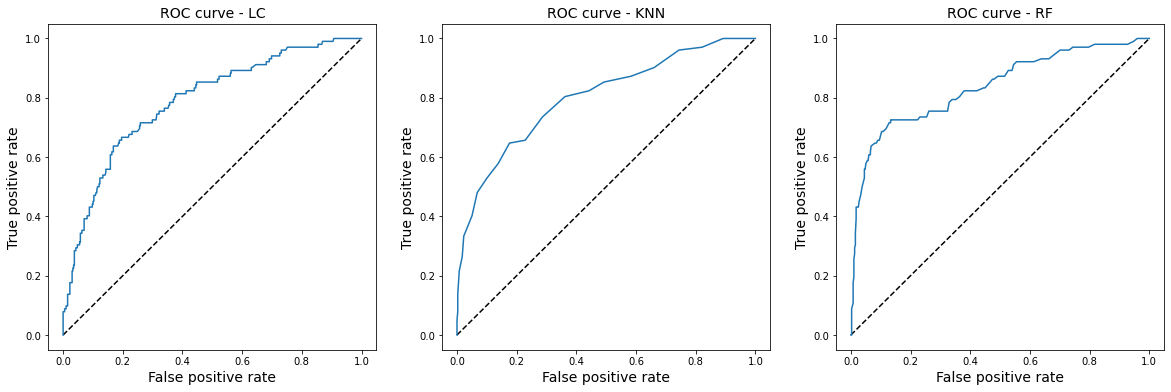

In [32]:
_, ax = plt.subplots(1, 3, figsize=[20, 6])

ax1 = ax[0]
ax1.plot([0, 1], [0, 1], 'k--')
ax1.plot(fpr_lr, tpr_lr, label='LR')
ax1.set_xlabel('False positive rate', fontsize=14)
ax1.set_ylabel('True positive rate', fontsize=14)
ax1.set_title('ROC curve - LC', fontsize=14)

ax2 = ax[1]
ax2.plot([0, 1], [0, 1], 'k--')
ax2.plot(fpr_knn, tpr_knn, label='LR')
ax2.set_xlabel('False positive rate', fontsize=14)
ax2.set_ylabel('True positive rate', fontsize=14)
ax2.set_title('ROC curve - KNN', fontsize=14)

ax3 = ax[2]
ax3.plot([0, 1], [0, 1], 'k--')
ax3.plot(fpr_rf, tpr_rf, label='LR')
ax3.set_xlabel('False positive rate', fontsize=14)
ax3.set_ylabel('True positive rate', fontsize=14)
ax3.set_title('ROC curve - RF', fontsize=14)

In [33]:
from sklearn import metrics

lr_auc = metrics.auc(fpr_lr, tpr_lr)
knn_auc = metrics.auc(fpr_knn, tpr_knn)
rf_auc = metrics.auc(fpr_rf, tpr_rf)

print('AUC for logistic regression: {:.2f}'.format(lr_auc))
print('AUC for K nearest neighbors: {:.2f}'.format(knn_auc))
print('AUC for random forest: {:.2f}'.format(rf_auc))

AUC for logistic regression: 0.79
AUC for K nearest neighbors: 0.80
AUC for random forest: 0.84


#### Conclusions:
- We tried three models: logistic regression, K nearest neighbors and random forest.
- The model with best performance is the random forest. 
- The corresponding metrics are: Accuracy = 76.80%; Precision = 0.46; Recall = 0.73; AUC = 0.84.
- As mentioned before, we care more about recall than precision since we want to keep our current customers as many as possible.